In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import re

In [10]:
df_art = pd.read_csv('tabular/artists.csv', skipinitialspace=True)
df_tra = pd.read_csv('tabular/tracks.csv', skipinitialspace=True)

<Axes: >

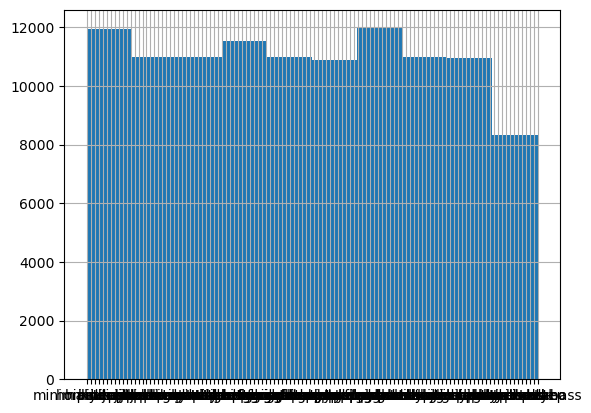

In [13]:
df_tra["genre"].hist()

# Artists dataset

In [4]:
#righe e colonne
df_art.shape

(30141, 5)

In [5]:
list(df_art.columns)

['id', 'name', 'popularity', 'followers', 'genres']

In [6]:
df_art[df_art["name"] == "The White Stripes"]["genres"]

8837    ['alternative rock', 'blues rock', 'detroit ro...
Name: genres, dtype: object

In [7]:
df_art.describe()

,popularity,followers
count,30140.000000,3.014000e+04
mean,36.659788,4.168663e+05
std,17.229059,2.484219e+06
min,0.000000,0.000000e+00
25%,24.000000,1.472000e+03
50%,37.000000,1.581450e+04
75%,49.000000,1.186392e+05
max,100.000000,1.141635e+08


In [8]:
df_art["followers"].max()

114163489.0

C:\Users\fabio\AppData\Local\Temp\ipykernel_1712\689605426.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_art.hist(ax=ax, bins=25)


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'followers'}>]], dtype=object)

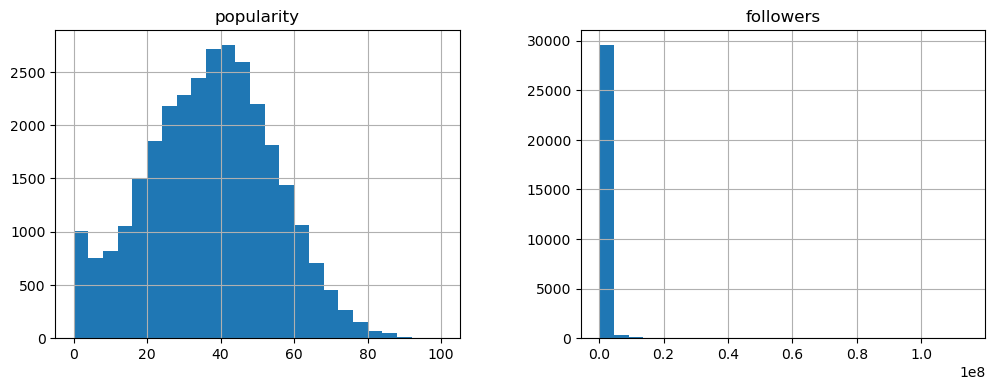

In [9]:
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
df_art.hist(ax=ax, bins=25)

### gestione duplicati

In [10]:
#artisti con lo stesso id e name (4)
duplicated_rows = df_art[df_art.duplicated(subset=['id', 'name'], keep=False)]
duplicated_rows.shape

(4, 5)

In [11]:
#artisti con lo stesso name (435)
duplicated_rows = df_art[df_art.duplicated(subset=['name'], keep=False)]
duplicated_rows.shape

(435, 5)

In [12]:
#rimozione artisti duplicati, mantenendo quelli con maggiore popolarità
df_art = df_art.sort_values(by=['popularity'])
df_art = df_art.drop_duplicates(subset='id', keep="last")
df_art = df_art.drop_duplicates(subset='name', keep="last")

In [13]:
#(sono state rimosse 223 righe)
df_art.shape

(29918, 5)

### missing values

In [14]:
#c'è un missing value
df_art.isna().sum()

id            1
name          1
popularity    1
followers     1
genres        1
dtype: int64

In [15]:
#df_art[df_art["id"].isnull()]

In [16]:
#rimuovo la riga nan
df_art = df_art.dropna()

In [17]:
#rimangono 29917 righe
df_art.shape

(29917, 5)

### outliers

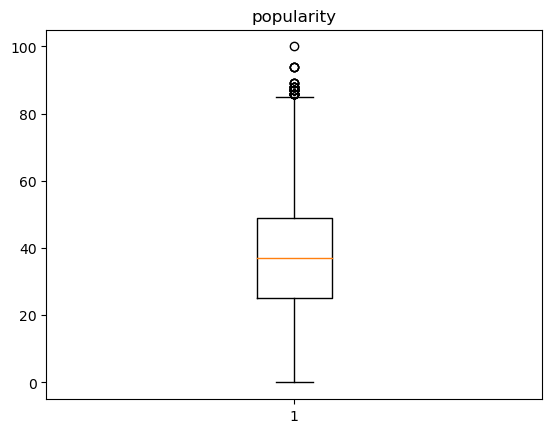

In [18]:
plt.boxplot(x=df_art["popularity"])
plt.title('popularity')
plt.show()

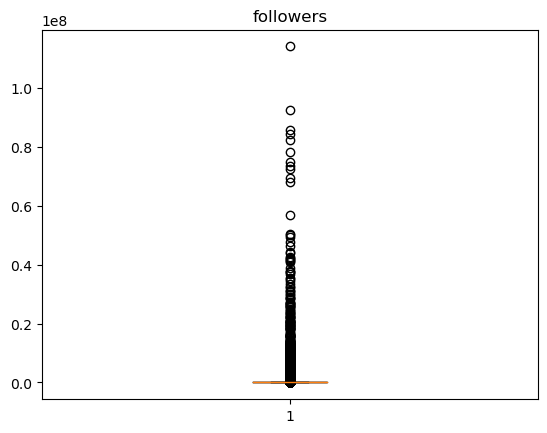

In [19]:
#distribuiti come power law (legge di zipf)
plt.boxplot(x=df_art["followers"])
plt.title('followers')
plt.show()

C:\Users\fabio\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


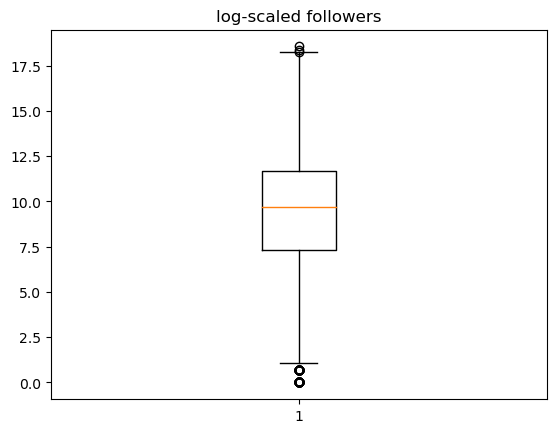

In [20]:
plt.boxplot(x=np.log(df_art["followers"]))
plt.title('log-scaled followers')
plt.show()

In [21]:
#descrizione numerica finale
df_art.describe()

,popularity,followers
count,29917.000000,2.991700e+04
mean,36.775579,4.193979e+05
std,17.190303,2.492215e+06
min,0.000000,0.000000e+00
25%,25.000000,1.530000e+03
50%,37.000000,1.615900e+04
75%,49.000000,1.208930e+05
max,100.000000,1.141635e+08


### quanti generi musicali unici

In [22]:
list_of_lists = list(df_art["genres"])
lista_generi = []

for lista in list_of_lists:
    lista = lista.strip('][').split(', ')
    for elem in lista:
        lista_generi.append(elem.strip('][').split(', ')[0])
    
lista_generi = set(lista_generi)
print(len(lista_generi))
#print(lista_generi)

4072


### normalizzazione (?)

# Tracks dataset

In [23]:
df_tra.shape

(109547, 34)

### analisi features

In [24]:
df_tra[["album_release_date", "album_release_date_precision"]].head()
#5856 anno
#56 mese
#103635 giorno

,album_release_date,album_release_date_precision
0,2017-09-22,day
1,2014-10-27,day
2,2018-06-22,day
3,2019-12-06,day
4,2016-09-16,day


In [25]:
#df_tra[df_tra["album_release_date_precision"] == "day"]["album_release_date"]

In [26]:
list(df_tra.columns)

['id',
 'name',
 'disc_number',
 'duration_ms',
 'explicit',
 'popularity',
 'track_number',
 'artists',
 'album_type',
 'album_name',
 'album_release_date',
 'album_release_date_precision',
 'album_total_tracks',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'features_duration_ms',
 'time_signature',
 'start_of_fade_out',
 'tempo_confidence',
 'time_signature_confidence',
 'key_confidence',
 'mode_confidence',
 'n_beats',
 'n_bars',
 'genre']

In [27]:
pd.options.display.max_columns = None

In [28]:
df_tra_uniq = df_tra.drop_duplicates(subset=['id','name','artists'] , keep="last")

In [29]:
features_numeriche = df_tra_uniq.select_dtypes(include='number').columns

for feature in features_numeriche:
    print(feature)
    print(df_tra_uniq[feature].mean())
    print(df_tra_uniq[feature].median())
    print(df_tra_uniq[feature].std())
    print(df_tra_uniq[feature].min(), " - ", df_tra_uniq[feature].max())
    print()

disc_number
1.0278785713488228
1.0
0.286297447313046
1  -  14

duration_ms
228519.16229191556
213240.0
101755.9038034676
8586  -  4120258

popularity
31.459868031752766
31.0
21.525546327934443
0  -  95

track_number
8.0107963870622
4.0
18.43542238992063
1  -  475

album_total_tracks
17.828966025433473
12.0
31.822017015368193
1  -  495

danceability
0.5620879084930834
0.576
0.17674637067429053
0.0  -  0.985

energy
0.6344785943104044
0.677
0.25669484183902136
0.0  -  1.0

key
5.284022017037525
5.0
3.5601569743525285
0  -  11

loudness
-8.500825739390622
-7.184
5.224758238447547
-49.531  -  4.532

mode
0.6368863532327754
1.0
0.480899894291051
0  -  1

speechiness
0.0874895876829636
0.049
0.11335561909705169
0.0  -  0.965

acousticness
0.3280420405661683
0.187
0.33835701136382806
0.0  -  0.996

instrumentalness
0.1736406185396407
5.84e-05
0.3240137112955323
0.0  -  1.0

liveness
0.2170720422700325
0.132
0.19498520044275347
0.0  -  1.0

valence
0.4694476551743388
0.457
0.2629482534805386
0

In [30]:
#la tabella  mostra una fortissima correlazione tra start_of_fade_out e duration_ms, per cui si elimina start_of_fade_out
df_tra.corr(numeric_only=True, method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,disc_number,duration_ms,explicit,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars
disc_number,1.000000,-0.009106,-0.021004,-0.018702,-0.001566,0.202374,-0.022219,-0.045653,-0.012215,-0.033731,0.018395,-0.016901,0.053815,-0.008381,0.020640,-0.000252,-0.002222,-0.009101,-0.014239,-0.008537,-0.017846,-0.025641,0.023513,0.014006,-0.006435,-0.005446
duration_ms,-0.009106,1.000000,-0.071396,0.007024,-0.085221,-0.125939,-0.082359,0.064298,0.010256,-0.000688,-0.039081,-0.066560,-0.114937,0.127054,0.014216,-0.167710,0.021835,0.999937,0.019617,0.998532,0.031522,-0.002703,0.001732,-0.003507,0.849724,0.836230
explicit,-0.021004,-0.071396,1.000000,0.025563,-0.032889,-0.043656,0.126670,0.097334,0.006149,0.109178,-0.037525,0.308391,-0.096627,-0.105597,0.030406,-0.001559,-0.001095,-0.071496,0.037450,-0.068656,-0.027744,0.001598,-0.070955,-0.097303,-0.064712,-0.067240
popularity,-0.018702,0.007024,0.025563,1.000000,-0.267250,-0.298723,0.030969,0.018622,-0.006321,0.066154,-0.010957,-0.058382,-0.035038,-0.117879,-0.001480,-0.013498,0.011834,0.007044,0.028738,0.006856,0.015259,0.094903,0.026462,0.066709,0.009459,0.003042
track_number,-0.001566,-0.085221,-0.032889,-0.267250,1.000000,0.800489,-0.064034,-0.111052,-0.003903,-0.115104,0.042857,-0.026925,0.109550,0.029229,-0.004379,0.026554,-0.029574,-0.085247,-0.046133,-0.085009,-0.057326,-0.055132,0.021539,0.020145,-0.087361,-0.078057
album_total_tracks,0.202374,-0.125939,-0.043656,-0.298723,0.800489,1.000000,-0.076127,-0.127540,-0.013267,-0.137796,0.058407,-0.038636,0.135517,0.030170,0.003443,0.052954,-0.034125,-0.125983,-0.054015,-0.124654,-0.058181,-0.063910,0.031840,0.024837,-0.122933,-0.112987
danceability,-0.022219,-0.082359,0.126670,0.030969,-0.064034,-0.076127,1.000000,0.135205,0.036004,0.261963,-0.066679,0.110410,-0.170737,-0.188981,-0.131647,0.478310,-0.045665,-0.082356,0.208431,-0.077973,0.457806,0.370903,-0.040673,-0.068648,-0.087742,-0.124489
energy,-0.045653,0.064298,0.097334,0.018622,-0.111052,-0.127540,0.135205,1.000000,0.049238,0.761420,-0.076707,0.142110,-0.734019,-0.186635,0.187388,0.265583,0.250302,0.064294,0.188164,0.074771,0.353609,0.235545,-0.102932,-0.198284,0.183014,0.141182
key,-0.012215,0.010256,0.006149,-0.006321,-0.003903,-0.013267,0.036004,0.049238,1.000000,0.039884,-0.136523,0.020591,-0.041822,-0.007148,-0.001918,0.033024,0.011476,0.010326,0.015559,0.010629,0.031729,0.019768,-0.045541,-0.070896,0.016117,0.012785
loudness,-0.033731,-0.000688,0.109178,0.066154,-0.115104,-0.137796,0.261963,0.761420,0.039884,1.000000,-0.039502,0.059443,-0.588812,-0.437220,0.078586,0.287398,0.215192,-0.000685,0.192108,0.008161,0.251039,0.283251,-0.042163,-0.083593,0.105509,0.071646


In [31]:
#rimozione features
features_to_remove = ["features_duration_ms", "n_beats", "n_bars", "start_of_fade_out"]

In [32]:
df_tra = df_tra.drop(columns=features_to_remove)

In [33]:
#correlation matrix aggiornata
#df_tra.corr(numeric_only=True, method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

### Rimozione delle tracce a cui non corrisponde nessun artista e degli artisti che non hanno nessuna traccia

In [34]:
#lista con tutti gli artisti presenti nel dataset tracce
tracks_artists = list(df_tra_uniq['artists'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('artist').drop_duplicates())

#lista con tutti gli artisti presenti nel dataset artists
artists_artists = list(set(list(df_art["name"])))

In [35]:
print(len(tracks_artists))
print(len(artists_artists))

29921
29917


In [36]:
#artisti presenti nel dataset tracks ma non in quello artists
artisti_spuri_tracce = [x for x in tracks_artists if x not in artists_artists]
artisti_spuri_tracce

['Vickeblanka',
 'ReStarT',
 'N/A',
 'Patrick Brasca',
 'Kay Kay',
 'sonoradinamita',
 'Sophiaaaahjkl',
 '8901']

In [37]:
df_tra_fan = df_tra
for artista in artisti_spuri_tracce:
    df_tra_fan = df_tra_fan.drop(df_tra_fan[df_tra_fan['artists'].str.contains(artista)].index)
#df_tra_fan


In [38]:
tracks_artists = list(df_tra_fan['artists'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('artist').drop_duplicates())
len(tracks_artists)

29902

In [39]:
#artisti presenti nel dataset artists ma non in quello tracks
artisti_spuri = [x for x in artists_artists if x not in tracks_artists]
artisti_spuri

['La Morocha',
 'Sophiaaaahjkl;8901',
 '8lak',
 'Kika Edgar',
 'Dan Stezo',
 'Los Primos MX',
 'Hosea',
 'El Dasa',
 'Pablo Montero',
 'Royal Philharmonic Orchestra;David Arnold',
 'Angels of Liberty',
 'Mariana Seoane',
 'Playa Limbo',
 'Restart',
 'Banda El Recodo']

In [40]:
for artista in artisti_spuri:
    df_art = df_art.drop(df_art[df_art['name'] == artista].index)

In [41]:
df_art.shape

(29902, 5)

In [42]:
df_tra = df_tra_fan
df_tra.shape #con 29902 artisti

(109521, 30)

### Per le analisi numeriche/grafiche ha senso considerare le tracce uniche

In [43]:
df_tra_uniq = df_tra.drop_duplicates(subset=['id','name','artists'] , keep="last")

In [44]:
df_tra_uniq.shape

(89541, 30)

In [45]:
df_tra_uniq.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence
count,89541.000000,8.954100e+04,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000
mean,1.027887,2.285171e+05,31.460124,8.010900,17.829564,0.562045,0.634441,5.283691,-8.501811,0.636893,0.087501,0.328064,0.173661,0.217100,0.469401,122.066182,3.897354,0.444390,0.875331,0.489411,0.509955
std,0.286339,1.017666e+05,21.525880,18.437831,31.826330,0.176740,0.256715,3.560203,5.225032,0.480898,0.113369,0.338387,0.324023,0.195002,0.262951,30.119610,0.453581,0.302009,0.218981,0.248350,0.182800
min,1.000000,8.586000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.000000,1.729600e+05,15.000000,1.000000,6.000000,0.450000,0.457000,2.000000,-10.327000,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.271000,4.000000,0.167000,0.855000,0.322000,0.397000
50%,1.000000,2.132300e+05,31.000000,4.000000,12.000000,0.576000,0.677000,5.000000,-7.185000,1.000000,0.049000,0.187000,0.000058,0.132000,0.457000,122.015000,4.000000,0.413000,0.987000,0.507000,0.521000
75%,1.000000,2.642280e+05,48.000000,9.000000,19.000000,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.098300,0.279000,0.682000,140.079000,4.000000,0.730000,1.000000,0.666000,0.635000
max,14.000000,4.120258e+06,95.000000,475.000000,495.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000,1.000000,1.454000,1.000000


### missing values

In [46]:
#non ci sono missing values
df_tra.isna().sum()

id                              0
name                            0
disc_number                     0
duration_ms                     0
explicit                        0
popularity                      0
track_number                    0
artists                         0
album_type                      0
album_name                      0
album_release_date              0
album_release_date_precision    0
album_total_tracks              0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
time_signature                  0
tempo_confidence                0
time_signature_confidence       0
key_confidence                  0
mode_confidence                 0
genre         

### outliers (anomaly detection) (da applicare al dataset completo o a quello con le tracce uniche?)

### qualche grafichino

In [47]:
df_tra_num = df_tra.select_dtypes(include=np.number)

C:\Users\fabio\AppData\Local\Temp\ipykernel_1712\4010325601.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_tra_uniq.hist(ax = ax)


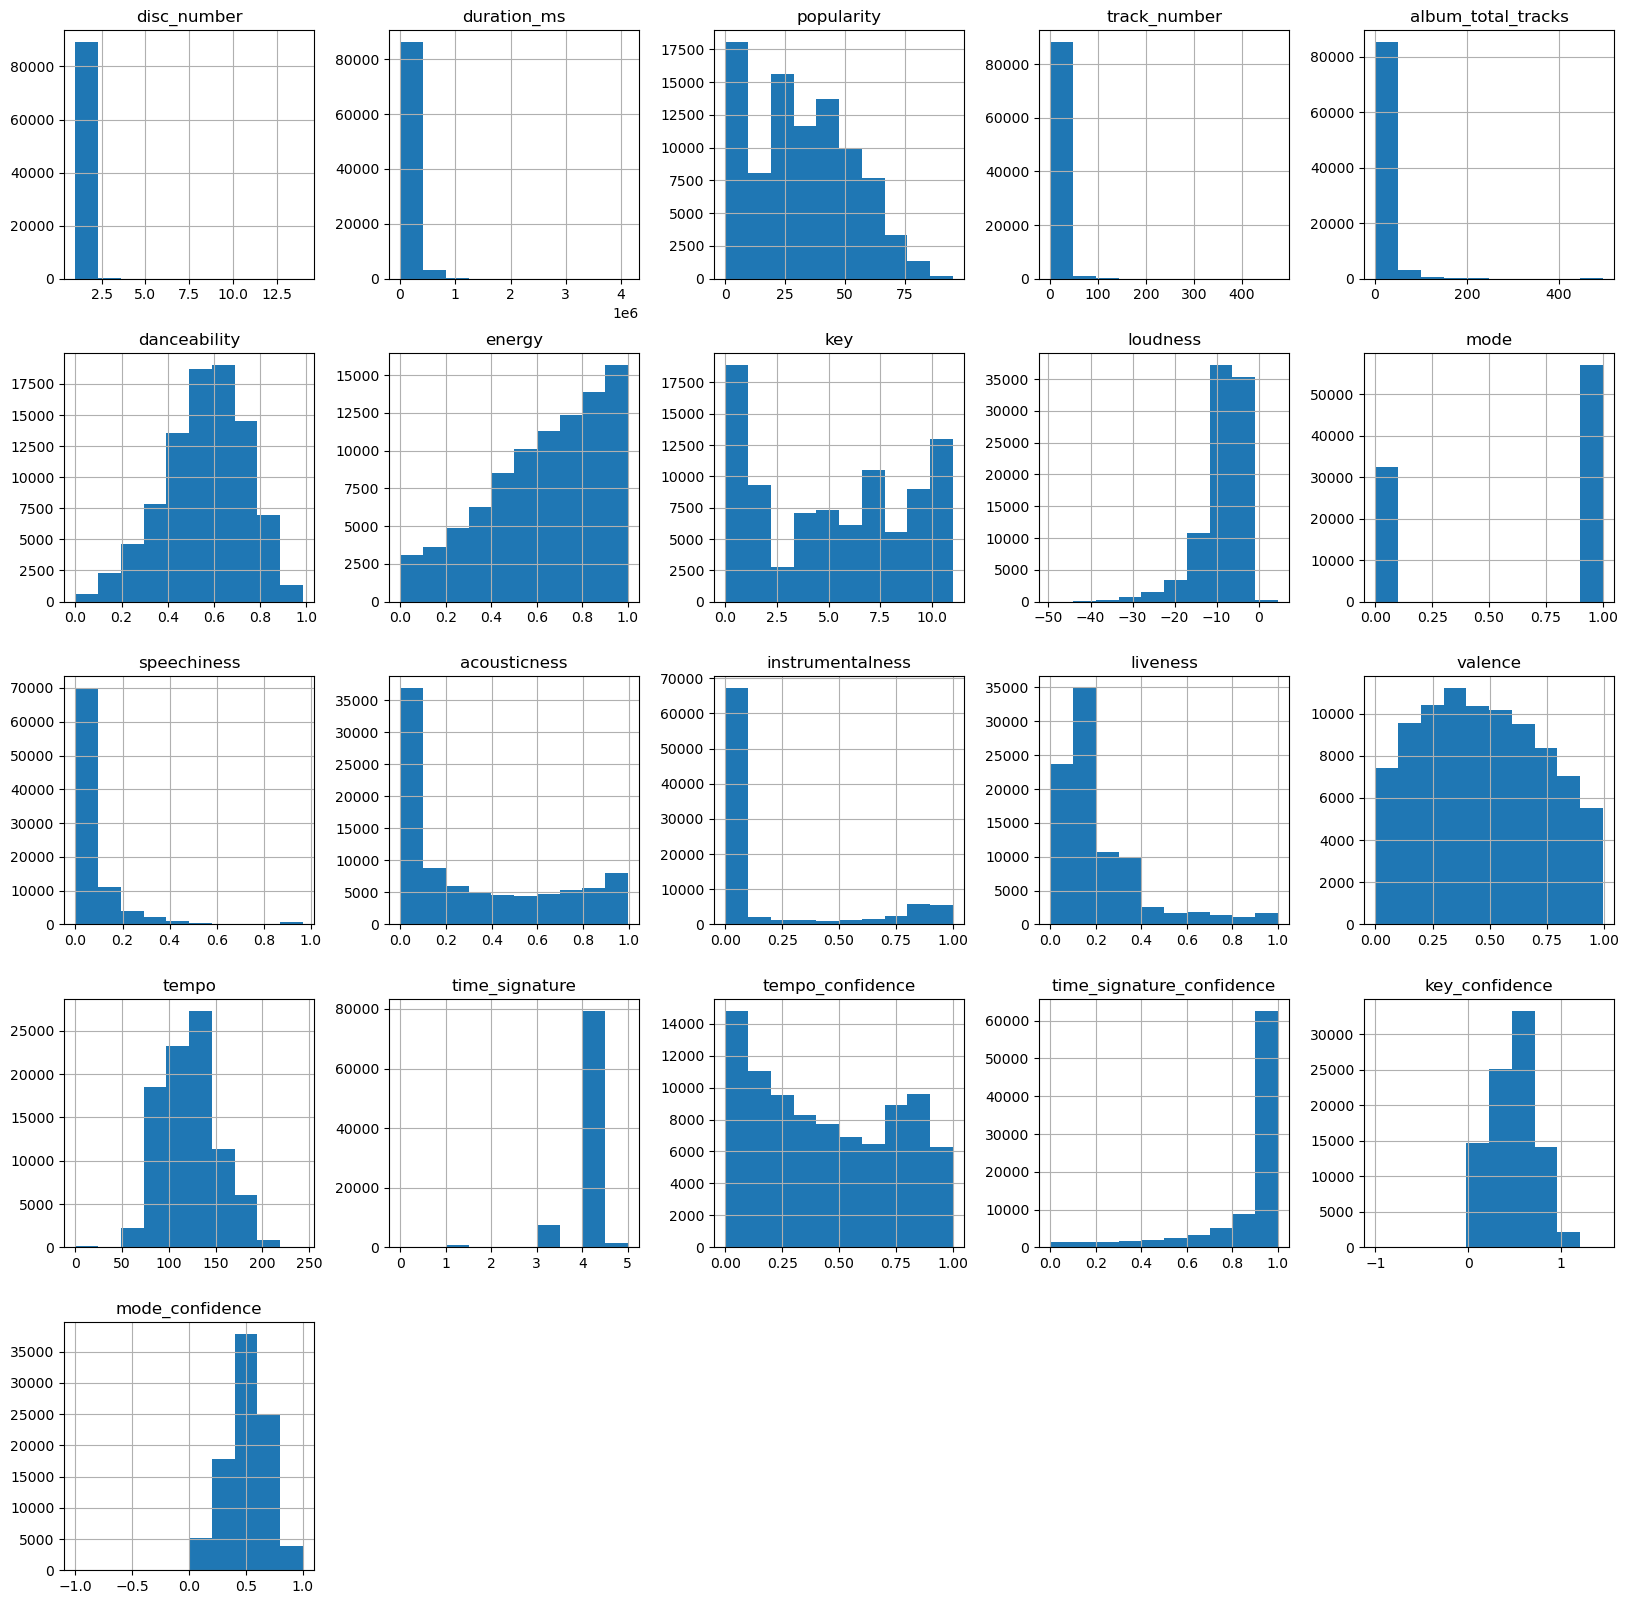

In [48]:
#df_tra_uniq.hist()
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_tra_uniq.hist(ax = ax)
plt.show()

## Fondo i due dataset

In [51]:
merged_df = pd.merge(df_art, df_tra[df_tra['artists'].str.contains('|'.join(df_art['name'].apply(re.escape)))], how='inner', left_on='name', right_on='artists')

In [53]:
merged_df = merged_df.rename(columns={'id_x': 'artist_id', 'name_x': 'name_artist', 'popularity_x':'popularity_artist', 'genres':'genres_artist', 'id_y':'id_track', 'name_y':'name_track', 'popularity_y':'popularity_track', 'track':'genre_track'}) 

In [54]:
merged_df

,artist_id,name_artist,popularity_artist,followers,genres_artist,id_track,name_track,disc_number,duration_ms,explicit,popularity_track,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genre
0,4bs90uhVxZFrNaqUoajuuQ,Helzgloriam,0.0,139.0,['iranian metal'],4rof1QpD8Ah8j6YDUFkBVx,Fosil,1,254401,False,0,9,Helzgloriam,album,Decapitated mystics of the serpent,2020-07-20,day,9,0.200,0.938,3,-5.112,0,0.0808,0.000017,0.927000,0.3470,0.2120,114.962,3,0.120,0.975,0.205,0.291,iranian
1,4bs90uhVxZFrNaqUoajuuQ,Helzgloriam,0.0,139.0,['iranian metal'],3VhoqmW3pl0LqBIyCEAKMG,Tēsifōn,1,288379,False,0,7,Helzgloriam,album,Decapitated mystics of the serpent,2020-07-20,day,9,0.298,0.942,11,-5.410,0,0.1820,0.000066,0.666000,0.0861,0.0384,179.811,3,0.411,0.858,0.560,0.563,iranian
2,4bs90uhVxZFrNaqUoajuuQ,Helzgloriam,0.0,139.0,['iranian metal'],2gmadK5mFVz6OGDoiBItE0,Humanoid,1,204666,False,0,3,Helzgloriam,album,Decapitated mystics of the serpent,2020-07-20,day,9,0.444,0.892,7,-4.254,1,0.0431,0.000459,0.073300,0.6530,0.2400,124.025,4,0.800,0.882,0.417,0.388,iranian
3,4bs90uhVxZFrNaqUoajuuQ,Helzgloriam,0.0,139.0,['iranian metal'],7rOzf8Tw98uePHcZvRWxx7,Aeon of achamenid,1,337871,False,0,8,Helzgloriam,album,Decapitated mystics of the serpent,2020-07-20,day,9,0.119,0.916,6,-4.052,0,0.0573,0.000012,0.481000,0.0578,0.1360,154.964,4,0.227,1.000,0.426,0.503,iranian
4,68YWZeIVZpkvH7vBqWd5Le,Spookie Blue,0.0,10.0,[],1es5dFE0XW5vfwNSAi0SoO,Nothing But Love,1,189253,False,0,1,Spookie Blue,single,Nothing But Love,2010-06-11,day,1,0.765,0.647,0,-11.348,1,0.0352,0.055900,0.003690,0.1000,0.4500,91.996,4,0.138,1.000,0.977,0.737,kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81473,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100.0,82377431.0,['pop'],3hUxzQpSfdDqwM3ZTFQY0K,august,1,261922,False,91,8,Taylor Swift,album,folklore,2020-07-24,day,16,0.532,0.623,5,-9.208,1,0.0331,0.538000,0.000073,0.0925,0.4030,89.937,4,0.331,1.000,0.902,0.669,pop
81474,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100.0,82377431.0,['pop'],3fVnlF4pGqWI9flVENcT28,Wildest Dreams,1,220440,False,83,9,Taylor Swift,album,1989,2014-01-01,day,13,0.553,0.664,8,-7.417,1,0.0741,0.070900,0.005600,0.1060,0.4670,140.060,4,0.787,1.000,0.454,0.518,pop
81475,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100.0,82377431.0,['pop'],1R0a2iXumgCiFb7HEZ7gUE,Don’t Blame Me,1,236413,False,91,4,Taylor Swift,album,reputation,2017-11-10,day,15,0.615,0.534,9,-6.719,0,0.0386,0.106000,0.000018,0.0607,0.1930,135.917,4,0.173,1.000,0.388,0.443,pop
81476,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100.0,82377431.0,['pop'],1D4PL9B8gOg78jiHg3FvBb,Love Story,1,236266,False,81,6,Taylor Swift,album,Fearless (Big Machine Radio Release Special),2008-11-11,day,26,0.617,0.741,2,-3.970,1,0.0311,0.131000,0.000000,0.0772,0.3060,118.984,4,0.838,0.936,0.379,0.591,pop


### nuove features?

### normalizzazione?

### dimensionality reduction da fare prima del task specifico o qui?

## Numerical statistics on correct dataset

In [18]:
df_tra = pd.read_csv('tabular/tracks_unduplicated.csv', skipinitialspace=True)

In [28]:
features_numeriche = df_tra.select_dtypes(include='number').columns

for feature in features_numeriche:
    print(feature)
    print(df_tra[feature].mean())
    print(df_tra[feature].median())
    print(df_tra[feature].mode()[0])
    print(df_tra[feature].std())
    print(df_tra[feature].min(), " - ", df_tra[feature].max())
    print()

duration_ms
230374.92976687523
215026.0
180000
103445.913379274
8586  -  4120258

popularity
32.845600671815674
32.0
0
20.850470836848796
0  -  95

danceability
0.5599464913006966
0.573
0.598
0.17717888893662953
0.0  -  0.985

energy
0.635615540520657
0.679
0.961
0.2580595423964847
0.0  -  1.0

key
5.283333530462347
5.0
7
3.557210649953442
0  -  11

loudness
-8.560103303488003
-7.236
-5.879
5.274830973791464
-49.531  -  4.532

mode
0.6338249730918897
1.0
1
0.4817609591074014
0  -  1

speechiness
0.08837336392775616
0.049
0.0324
0.11526337390058333
0.0  -  0.965

acousticness
0.3283153419487386
0.188
0.995
0.33952936131528155
0.0  -  0.996

instrumentalness
0.18094519498290892
7.99e-05
0.0
0.3289658694440496
0.0  -  1.0

liveness
0.21884207730611377
0.133
0.111
0.1970970512685519
0.0  -  1.0

valence
0.4654600052160337
0.452
0.961
0.26320954071102015
0.0  -  0.995

tempo
122.15249146628503
122.023
0.0
30.08366717815545
0.0  -  243.372

time_signature
3.8976427312619015
4.0
4
0.453425396

C:\Users\fabio\AppData\Local\Temp\ipykernel_17500\762448969.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_tra.hist(ax = ax)


array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'tempo_confidence'}>,
        <Axes: title={'center': 'time_signature_confidence'}>],
       [<Axes: title={'center': 'key_confidence'}>,
        <Axes: title={'center': 'mode_confidence'}>, <Axes: >, <Axes: >]],
      dtype=object)

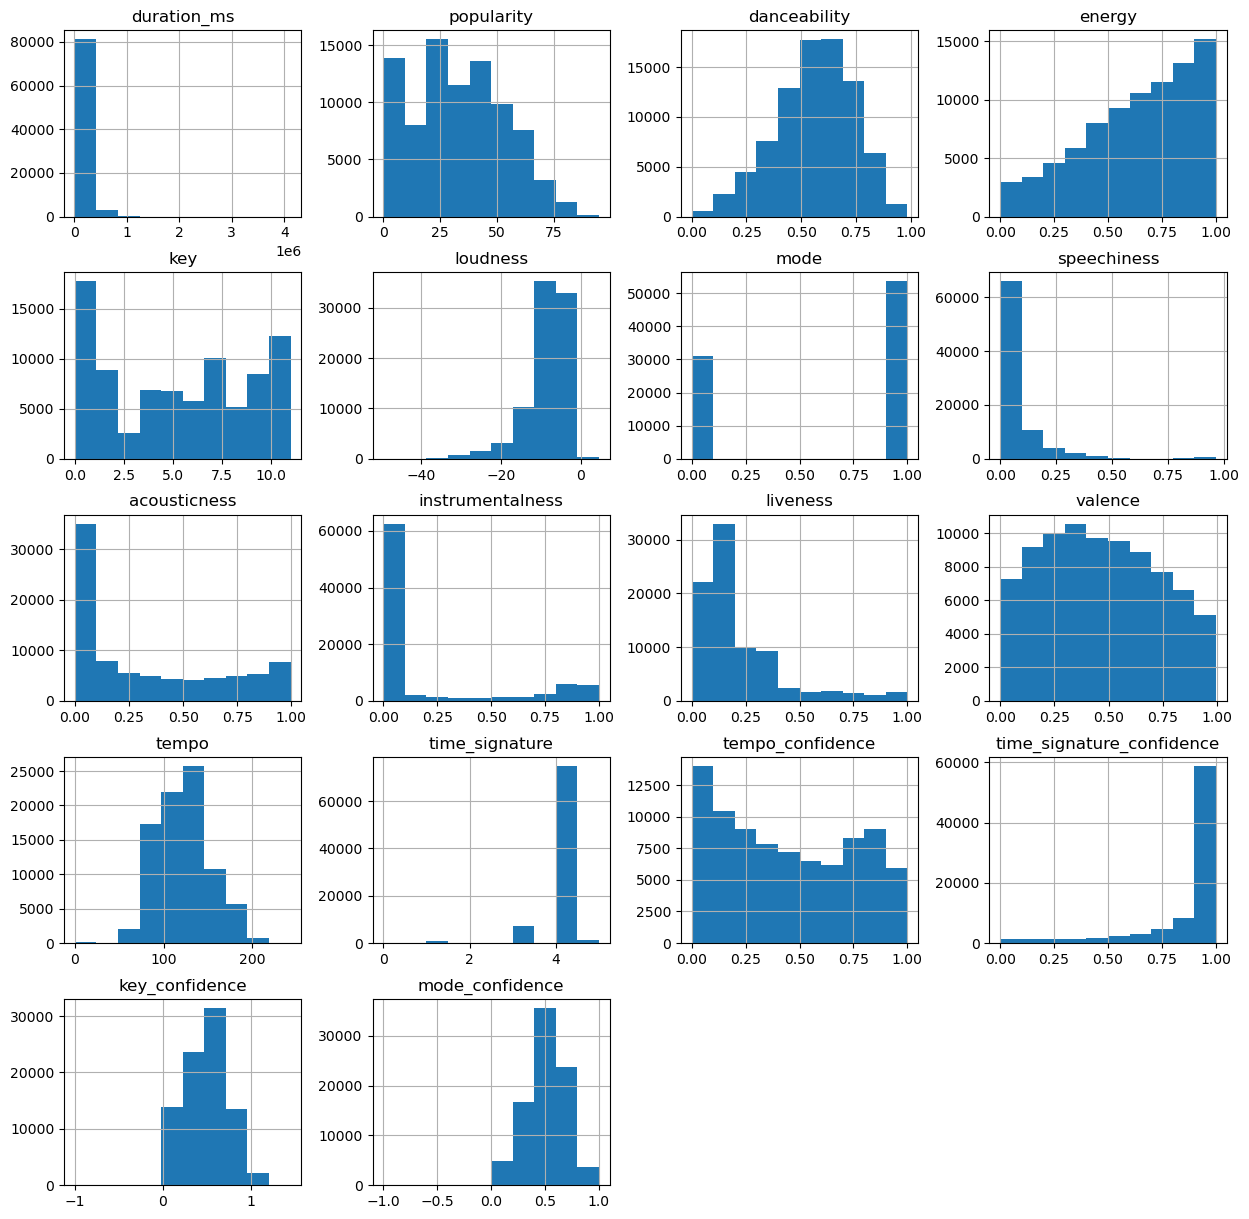

In [51]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_tra.hist(ax = ax)

C:\Users\fabio\AppData\Local\Temp\ipykernel_17500\2032093349.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_tra[["popularity", "danceability", "energy", "tempo_confidence"]].hist(ax = ax)


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'tempo_confidence'}>]], dtype=object)

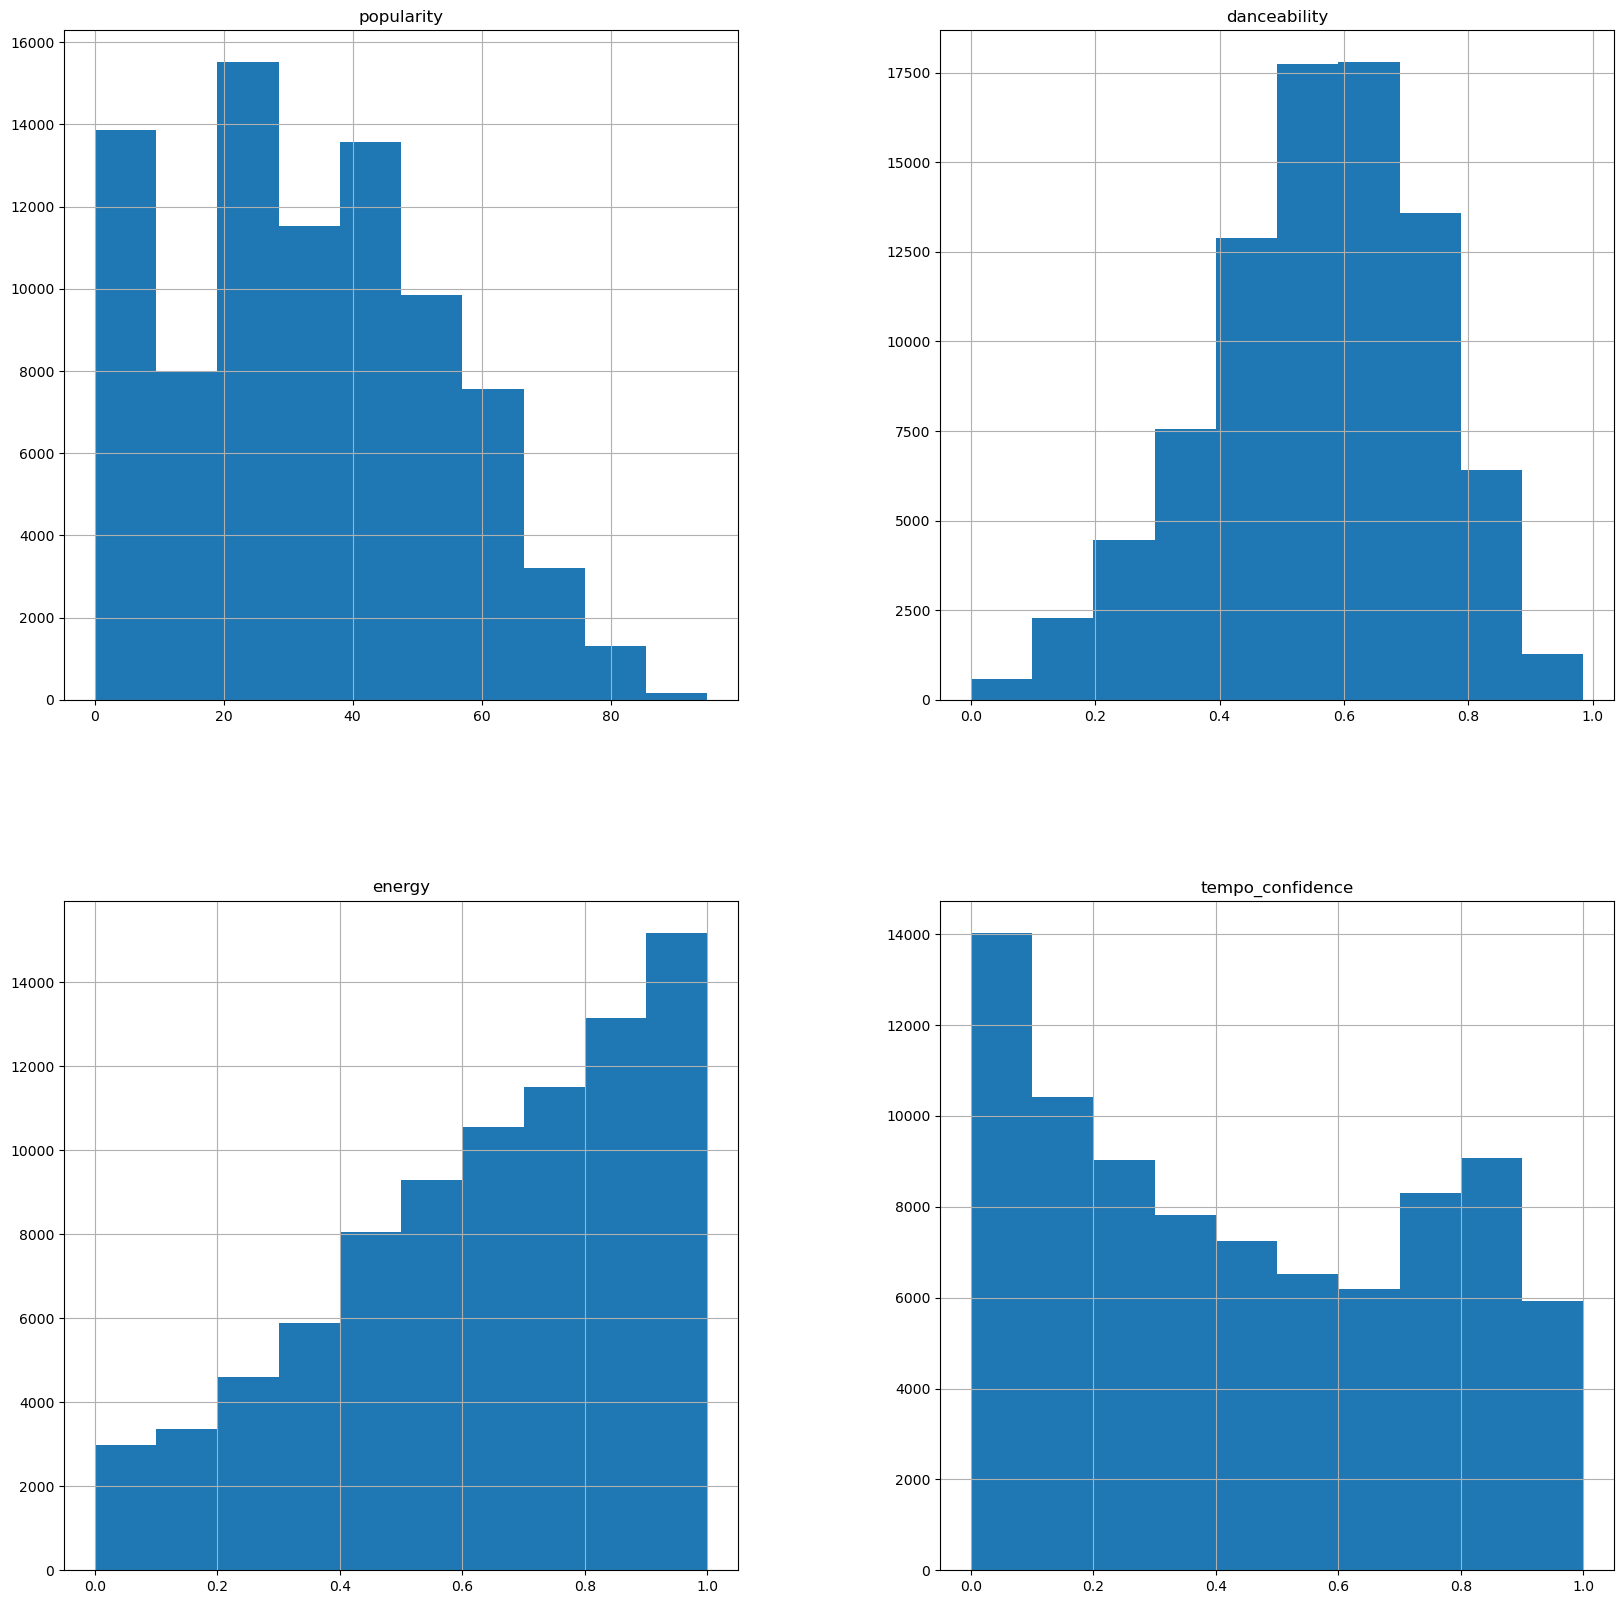

In [47]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_tra[["popularity", "danceability", "energy", "tempo_confidence"]].hist(ax = ax)

# Time Series Understanding and Preparation

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy

from sktime.transformations.panel.dictionary_based import PAA

from sktime.transformations.series.sax import SAX2

In [3]:
def load_npy(filename):
    return np.load(filename)

def approximate(ts, approx):
    return approx.fit_transform(ts)

In [4]:
# reload full-length time series
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [5]:
#10000 time series di lunghezza 1280
X.shape

(10000, 1, 1280)

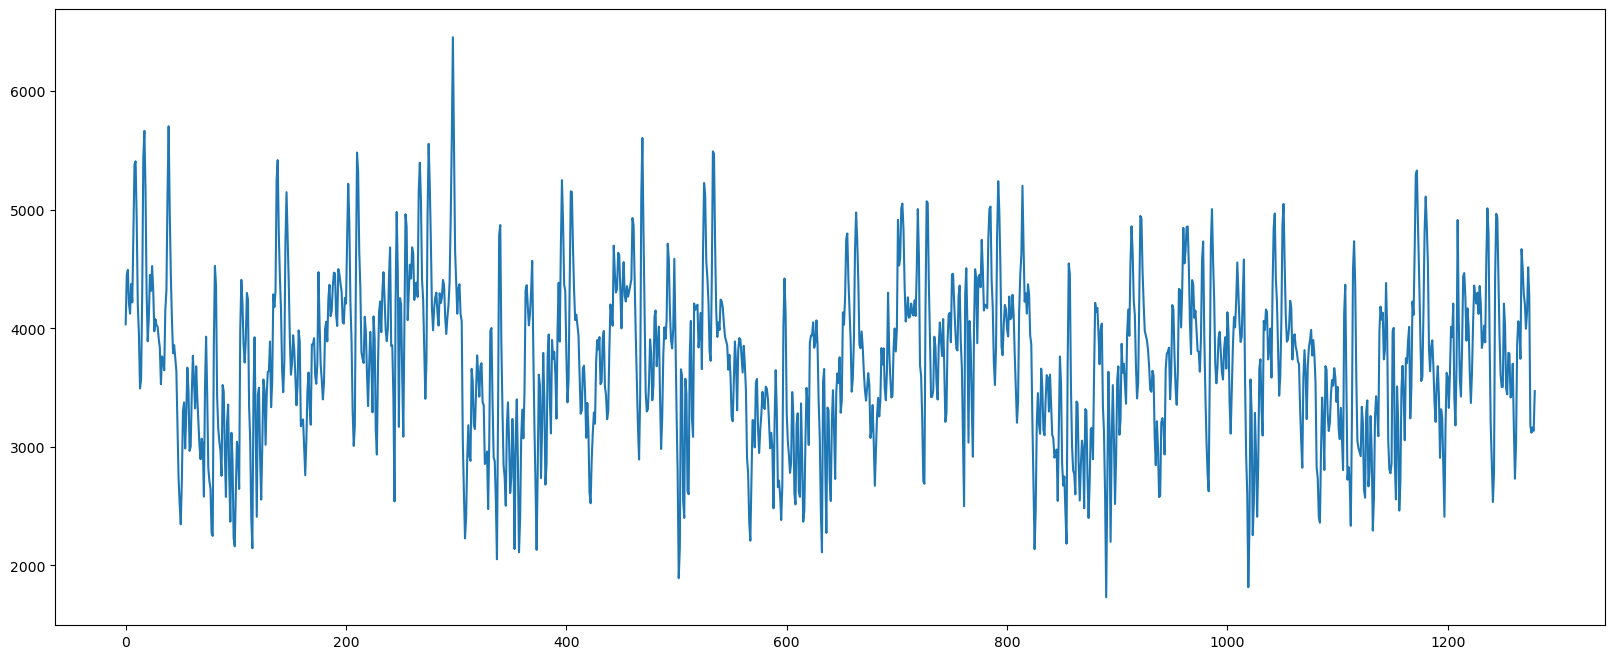

In [6]:
# Visualize a Time Series
ind = 0

plt.figure(figsize=(20,8))
plt.plot(X[ind][0])
plt.show()

### Approximations (usiamo solo PAA 128)

In [61]:
#Use this to turn a non-approximated ts in an approximated one (with PAA = 128)
#paa = PAA(num_intervals=128)
#X_paa = np.array([[approximate(ts[0], paa)[:,0]] for ts in X])
#X_paa.shape

(10000, 1, 128)

In [62]:
#np.savez('X_paa_128', X_paa)

In [7]:
# reload paa-approximated time series
X_paa_file = load_npy('X_PAA_128.npz') 
X_paa = X_paa_file["arr_0"]
X_paa.shape

(10000, 1, 128)

In [2]:
plt.rcParams.update({'font.size': 18})

NameError: name 'plt' is not defined

In [14]:
ts1_paa = []
for x in X_paa[ind][0]:
    ts1_paa += ([x]*10)
    
    
len(ts1_paa)

1280

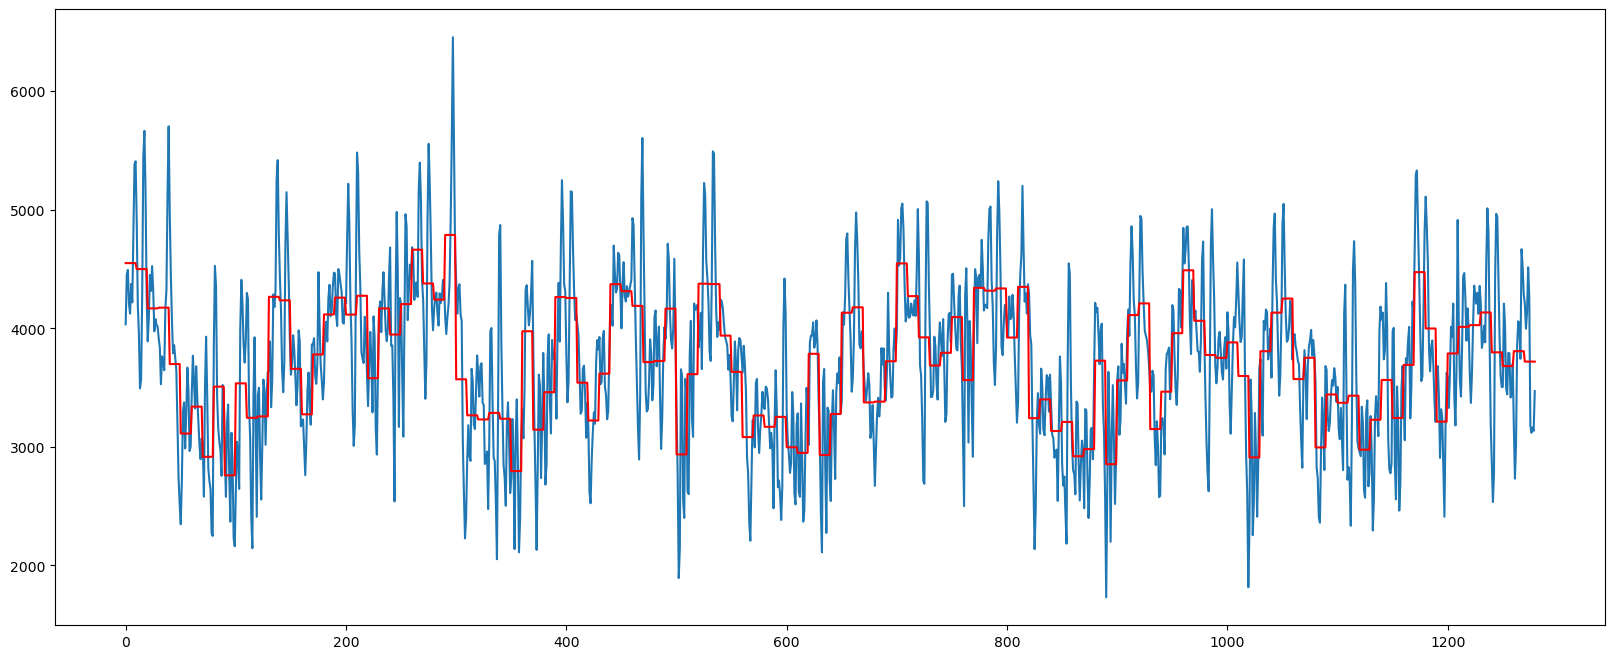

In [17]:
# Visualize a Time Series

ts1_paa = []
for x in X_paa[ind][0]:
    ts1_paa += ([x]*10)

ind = 0

plt.figure(figsize=(20,8))

plt.plot(X[ind][0])
plt.plot(ts1_paa, c="red")

plt.show()

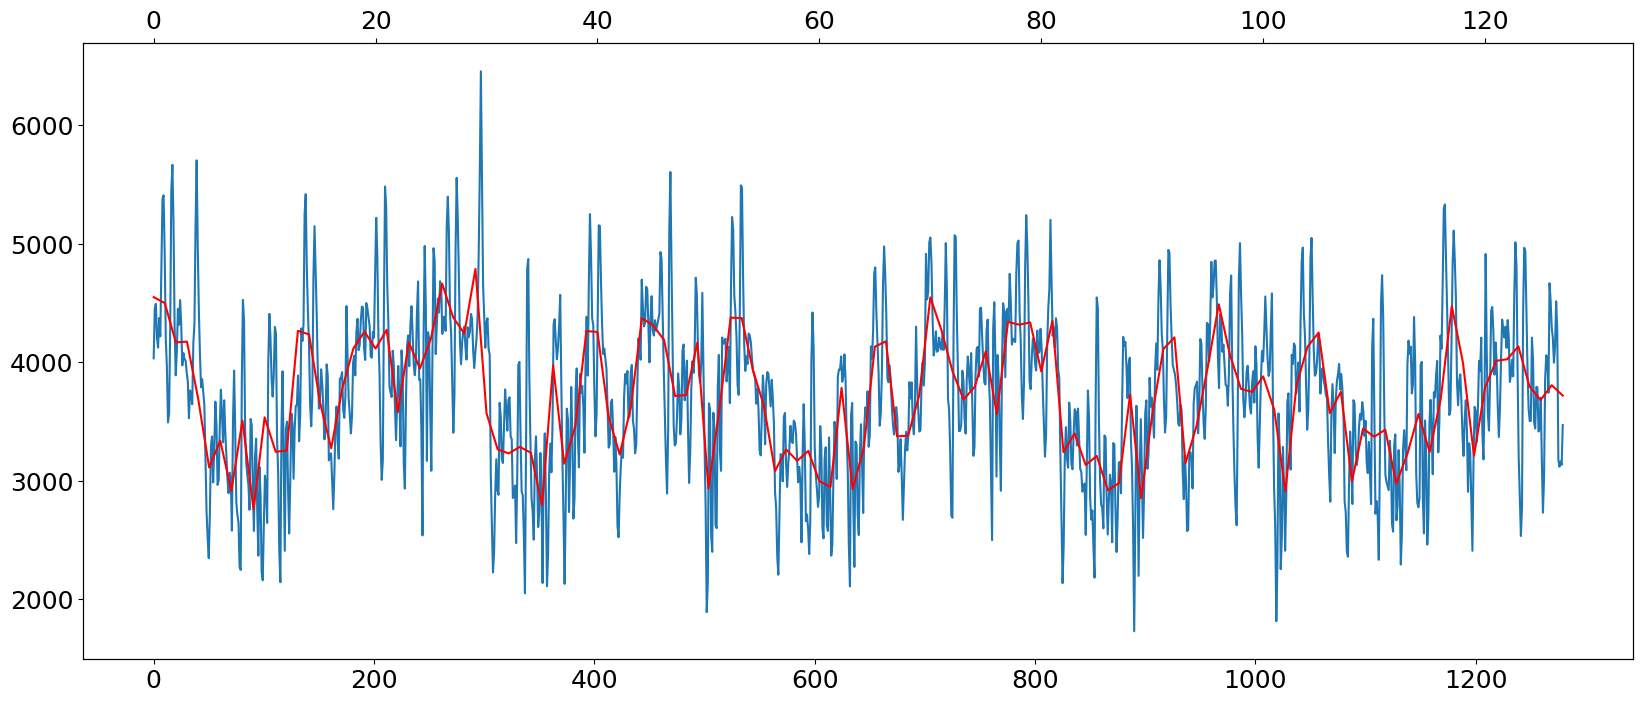

In [74]:
#version 1
ind = 0

ts_to_show = pd.Series(X[ind][0])
paa_ts_to_show = pd.Series(X_paa[ind][0])
#paa_ts_to_show = pd.Series(discretize(X_paa[ind][0]))

fig, ax1 = plt.subplots(figsize=(20, 8))
plt.grid(False)
ax1.plot(ts_to_show.index, ts_to_show, label="ts")
ax2 = ax1.twiny()
ax2.plot(paa_ts_to_show.index, paa_ts_to_show, "r-", label="paa")
plt.grid(False)

In [114]:
# Use this to turn a (non)-approximated ts in an approximated one (with SAX = 20)
#sax = SAX2(word_size=20, alphabet_size=5)
#X_sax = sax.fit_transform(X_paa)
#X_sax.shape

In [119]:
# reload paa_sax-approximated time series
#X_paa_sax_file = load_npy('X_PAA_SAX_appr.npz') 
#X_paa_sax = X_paa_sax_file["arr_0"]
#X_paa_sax.shape

(10000, 1, 20)

In [9]:
ind = 0

ts_to_show = pd.Series(X[ind][0])
paa_ts_to_show = pd.Series(X_paa[ind][0])
sax_ts_to_show = pd.Series(X_paa_sax[ind][0])

fig, ax1 = plt.subplots(figsize=(20, 8))

plt.grid(False)
ax1.plot(ts_to_show.index, (ts_to_show - ts_to_show.mean()) / ts_to_show.std(), label="ts")
# bin_edges = scipy.stats.norm.ppf(np.linspace(0, 1, 6)[1:-1])
# ax1.hlines(bin_edges, 0, len(y), color="black", linestyles="dashed", alpha=0.5)
ax2 = ax1.twiny()
ax2.plot(sax_ts_to_show.index, (sax_ts_to_show - sax_ts_to_show.mean()) / sax_ts_to_show.std(), "r-", label="sax")
ax2 = ax1.twiny()
ax2.plot(paa_ts_to_show.index, (paa_ts_to_show - paa_ts_to_show.mean()) / paa_ts_to_show.std(), "k-", label="paa")
plt.grid(False)
plt.legend()
plt.show()

NameError: name 'X_paa_sax' is not defined

### amplitude scaling

In [8]:
df = pd.DataFrame(np.squeeze(X_paa))

In [9]:
def amplitude_scaling(ts):
    return (ts - ts.mean()) / ts.std()

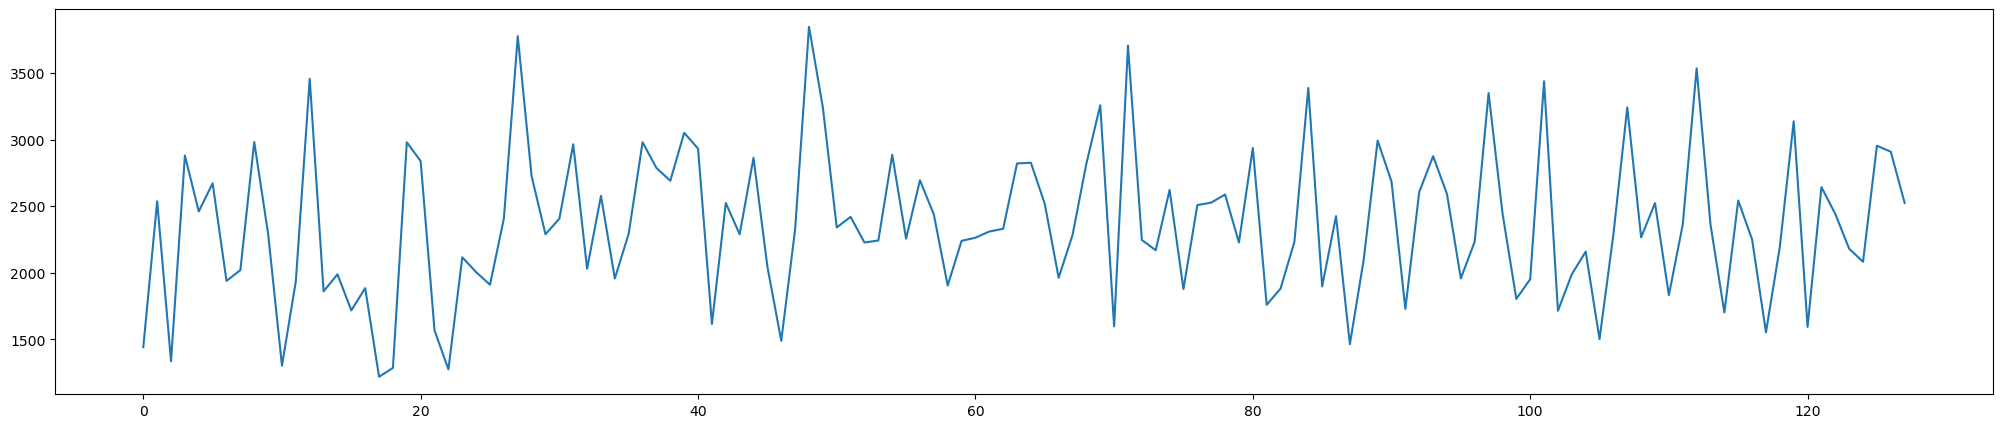

In [10]:
plt.figure(figsize=(25,5))
plt.plot(df.loc[1])
plt.show()

In [11]:
df = df.apply(amplitude_scaling, axis=1)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.702443,1.599171,0.919575,0.932186,-0.042492,-1.243665,-0.779033,-1.646302,-0.433254,-1.966250,...,0.572003,-1.038236,0.140977,0.600348,0.629495,0.848848,0.159703,-0.078054,0.179806,-0.000279
1,-1.637858,0.310530,-1.825436,0.921908,0.174616,0.550774,-0.752944,-0.608170,1.101991,-0.122575,...,-0.297776,1.378707,-1.367234,0.499729,0.141686,-0.323001,-0.497538,1.053144,0.972043,0.288231
2,-0.568524,-0.253418,0.051660,0.249729,0.235667,0.085573,-0.183348,-0.906773,-0.673214,-1.146805,...,1.135706,-0.384563,-1.097855,-1.125929,-1.790100,-0.951385,-1.228702,-0.875452,-0.259970,-0.624013
3,-0.112898,-0.139722,-0.083242,1.125098,1.405237,0.230201,1.205680,1.039524,-0.328323,0.039666,...,-0.384496,-1.513403,-0.692002,-0.768506,-1.676040,-0.203579,-0.087112,-1.294725,-0.845415,-0.085980
4,-1.132416,-1.256390,-0.839903,-1.104263,-0.065601,2.524675,0.713889,0.745376,2.350978,-0.327128,...,-0.381015,-0.013199,0.565572,1.541780,1.165050,0.604195,-0.049109,-0.395102,-0.621280,-1.018451


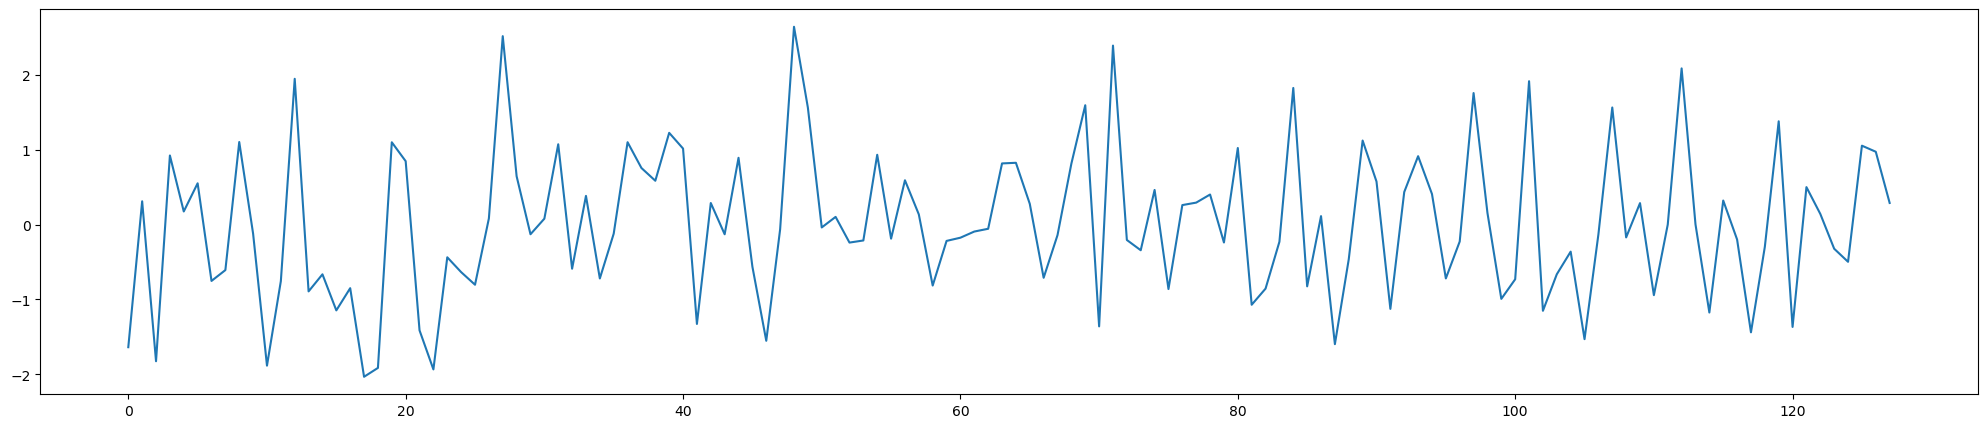

In [13]:
plt.figure(figsize=(25,5))
plt.plot(df.loc[1])
plt.show()

In [17]:
X_train = df.to_numpy().reshape(10000, 1, 128)

In [18]:
#np.savez('X_paa_128_scaled', X_train)